In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

In [2]:
df = pd.read_csv('Phishing Data.csv')

In [3]:
df2 = df.copy()

In [4]:
df.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
0,1673,0.128512,2,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0.027907,132,1
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,3,1,0,0.013008,338,1
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0.006116,292,1
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.012048,102,1
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,2,0.063025,136,1


In [5]:
df.shape

(525754, 22)

In [6]:
df.isnull().sum()

Total Number of Characters C        0
Vocabulary richness W/C             0
Account                             0
Access                              0
Bank                                0
Credit                              0
Click                               0
Identity                            0
Inconvenience                       0
Information                         0
Limited                             0
Minutes                             0
Password                            0
Recently                            0
Risk                                0
Social                              0
Security                            0
Service                             0
Suspended                           0
Total number of Function words/W    0
Unique Words                        0
Phishing Status                     0
dtype: int64

In [7]:
df['Phishing Status'].value_counts()

0    517402
1      8352
Name: Phishing Status, dtype: int64

In [8]:
df.describe()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
count,5.257540e+05,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,...,525754.000000,525754.000000,525754.00000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000,525754.000000
mean,2.276502e+03,0.120999,0.088178,0.126308,0.050759,0.155843,0.121635,0.003815,0.003167,0.289873,...,0.023981,0.034453,0.11234,0.007874,0.048199,0.131139,0.004991,0.003818,153.298839,0.015886
std,7.593063e+03,0.024149,0.636271,0.734079,0.559868,1.253096,0.687737,0.086242,0.059889,1.215314,...,0.287013,0.314402,0.77089,0.231209,0.456293,0.823307,0.088576,0.007944,200.706245,0.125034
min,1.100000e+01,0.013260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,7.900000e+02,0.104895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000
50%,1.297000e+03,0.121898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000
75%,2.248000e+03,0.138456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.004785,167.000000,0.000000
max,1.985307e+06,0.228647,63.000000,65.000000,34.000000,88.000000,48.000000,9.000000,3.000000,181.000000,...,17.000000,62.000000,54.00000,59.000000,45.000000,106.000000,7.000000,0.333333,24667.000000,1.000000


In [9]:
df.shape

(525754, 22)

In [10]:
df.corr()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
Total Number of Characters C,1.000000,0.015364,0.086415,0.156693,0.194119,0.207473,0.064340,0.043549,0.031305,0.191091,...,0.008881,0.272867,0.138914,0.063153,0.109808,0.263107,0.095353,0.019901,0.777286,0.054322
Vocabulary richness W/C,0.015364,1.000000,0.029611,0.081987,0.071024,0.089298,0.067862,0.008896,0.006164,0.132715,...,0.034500,0.105487,0.118150,0.029109,0.044204,0.121771,0.033222,0.108629,0.176997,-0.084871
Account,0.086415,0.029611,1.000000,0.177779,0.141145,0.081992,0.090980,0.138342,0.228418,0.129929,...,0.101886,0.123944,0.024666,0.021151,0.236259,0.078433,0.110110,0.405280,0.114535,0.498884
Access,0.156693,0.081987,0.177779,1.000000,0.115335,0.118780,0.101823,0.045566,0.079247,0.211926,...,0.102252,0.154984,0.089429,0.019545,0.179435,0.311337,0.053226,0.313356,0.269821,0.081297
Bank,0.194119,0.071024,0.141145,0.115335,1.000000,0.372057,0.029317,0.047751,0.024590,0.109932,...,0.008274,0.214388,0.204448,0.044005,0.111716,0.216228,0.062932,0.156617,0.293615,0.126890
Credit,0.207473,0.089298,0.081992,0.118780,0.372057,1.000000,0.025999,0.044130,0.021024,0.127348,...,-0.000565,0.188714,0.278598,0.022359,0.077597,0.248460,0.066764,0.201809,0.313598,0.015216
Click,0.064340,0.067862,0.090980,0.101823,0.029317,0.025999,1.000000,0.018632,0.015123,0.104834,...,0.088298,0.022587,0.037006,0.008498,0.046171,0.076723,0.024005,0.287146,0.127362,0.057225
Identity,0.043549,0.008896,0.138342,0.045566,0.047751,0.044130,0.018632,1.000000,0.048480,0.077263,...,0.009520,0.046641,0.008001,0.022722,0.079332,0.055690,0.030125,0.100812,0.055886,0.148720
Inconvenience,0.031305,0.006164,0.228418,0.079247,0.024590,0.021024,0.015123,0.048480,1.000000,0.031290,...,0.026786,0.044713,0.005931,0.001908,0.134803,0.028185,0.035027,0.145144,0.039945,0.175911
Information,0.191091,0.132715,0.129929,0.211926,0.109932,0.127348,0.104834,0.077263,0.031290,1.000000,...,0.040211,0.178722,0.143791,0.045589,0.150555,0.234295,0.050664,0.296983,0.313058,0.064776


<AxesSubplot:>

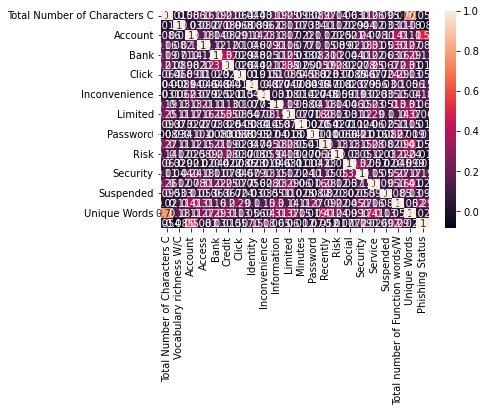

In [11]:
sns.heatmap(df.corr(), annot= True)

# Visualization Using seaborn

<AxesSubplot:xlabel='Suspended', ylabel='count'>

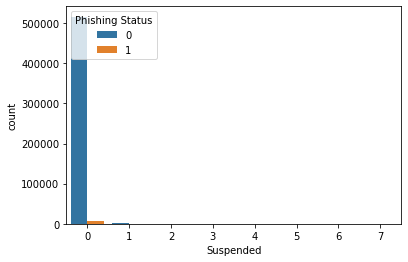

In [12]:
sns.countplot(x ='Suspended', hue = 'Phishing Status', data = df)

<AxesSubplot:xlabel='Suspended', ylabel='count'>

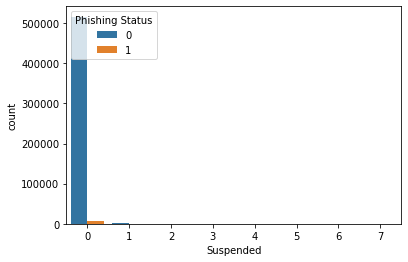

In [13]:
sns.countplot(x ='Suspended', hue = 'Phishing Status', data = df)

<AxesSubplot:xlabel='Security', ylabel='count'>

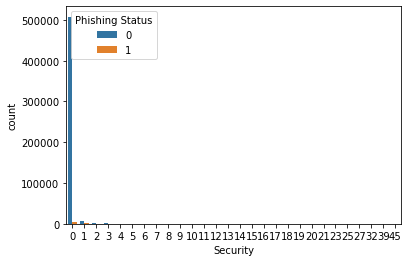

In [14]:
sns.countplot(x ='Security', hue = 'Phishing Status', data = df)

<AxesSubplot:xlabel='Risk', ylabel='count'>

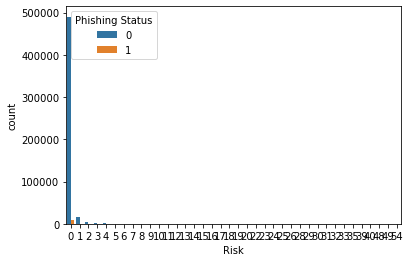

In [15]:
sns.countplot(x ='Risk', hue = 'Phishing Status', data = df)

<AxesSubplot:xlabel='Password', ylabel='count'>

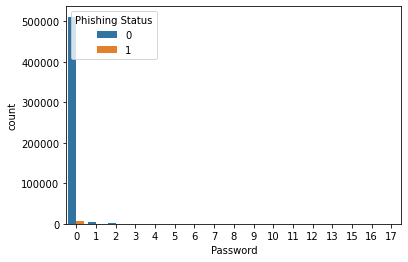

In [16]:
sns.countplot(x ='Password', hue = 'Phishing Status', data = df)

<AxesSubplot:xlabel='Credit', ylabel='count'>

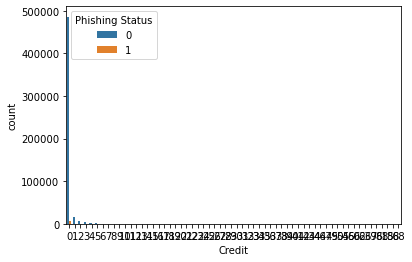

In [17]:
sns.countplot(x ='Credit', hue = 'Phishing Status', data = df)

In [18]:
x = df.drop('Phishing Status', axis= 1)
y = df['Phishing Status']

In [19]:
x.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Minutes,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words
0,1673,0.128512,2,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0.027907,132
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,0,3,1,0,0.013008,338
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0.006116,292
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.012048,102
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0.063025,136


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Phishing Status, dtype: int64

In [21]:
x.shape

(525754, 21)

In [22]:
y.shape

(525754,)

# Imblanced Data Handling

In [23]:
df['Phishing Status'].value_counts()

0    517402
1      8352
Name: Phishing Status, dtype: int64

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [24]:
smo = SMOTETomek(random_state = 42)

In [25]:
y.value_counts()

0    517402
1      8352
Name: Phishing Status, dtype: int64

In [26]:
x, y = smo.fit_resample(x,y)

In [27]:
x.shape

(1032714, 21)

In [28]:
y.shape

(1032714,)

In [29]:
y.value_counts()

1    516357
0    516357
Name: Phishing Status, dtype: int64

# Near Miss for UnderSample

In [30]:
x1 = df.drop('Phishing Status', axis= 1)
y1 = df['Phishing Status']

In [31]:
nms = NearMiss() 

In [32]:
N_x , N_y = nms.fit_resample(x1,y1)

In [33]:
N_x.shape

(16704, 21)

In [34]:
N_y.shape

(16704,)

In [35]:
N_y.value_counts()

0    8352
1    8352
Name: Phishing Status, dtype: int64

# RandomOverSample

In [36]:
ros = RandomOverSampler(random_state= 100)

In [37]:
R_x,R_y = ros.fit_resample(x1,y1)

In [38]:
R_x.shape

(1034804, 21)

In [39]:
R_y.shape

(1034804,)

In [40]:
R_y.value_counts()

1    517402
0    517402
Name: Phishing Status, dtype: int64

# CROSS validation 
### Hold Out cross validation

In [41]:
x2 = df.drop('Phishing Status', axis= 1)
y2 = df['Phishing Status']

In [42]:
xtrain,xtest, ytrain,ytest = train_test_split(x2, y2, train_size=.75,random_state=42) 

#### DecisionTreeClassifier()

In [43]:
Clf = DecisionTreeClassifier() 

In [44]:
Clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [45]:
Clf.score(xtest,ytest)

0.9929701230228472

### Sampling

##### SMOS data

In [46]:
x_train,x_test, y_train,y_test = train_test_split(x, y, train_size=.75,random_state=42) 

In [47]:
S_Clf = DecisionTreeClassifier() 

In [48]:
S_Clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
S_Clf.score(x_train,y_train)

0.9999961267082831

##### NMUS

In [50]:
x1_train,x1_test, y1_train,y1_test = train_test_split(N_x , N_y, train_size=.75,random_state=42) 

In [51]:
N_Clf = DecisionTreeClassifier() 

In [52]:
N_Clf.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [53]:
N_Clf.score(x1_test,y1_test)

0.9401340996168582

##### ROS

In [54]:
x2_train,x2_test, y2_train,y2_test = train_test_split(R_x,R_y, train_size=.75,random_state=42) 

In [55]:
R_Clf = DecisionTreeClassifier() 

In [56]:
R_Clf.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [57]:
R_Clf.score(x2_test,y2_test)

0.9980054193837674

## XGBoost Classifier

In [58]:
xgb = XGBClassifier()

In [59]:
xgb_s = XGBClassifier()

In [60]:
xgb_n = XGBClassifier()

In [61]:
xgb_r = XGBClassifier()

In [62]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
xgb.score(xtest,ytest)

0.9952525506128318

In [64]:
xgb_s.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
xgb_s.score(x_test,y_test)

0.9879308541748167

In [66]:
xgb_n.fit(x1_train,y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
xgb_n.score(x1_test,y1_test)

0.9530651340996169

In [68]:
xgb_r.fit(x2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
xgb_r.score(x2_test,y2_test)

0.9823734736239906

# Ada Boost

In [70]:
ada = AdaBoostClassifier()

In [71]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [72]:
ada.score(xtest,ytest)

0.9915550179170566

In [73]:
ada_s = AdaBoostClassifier()

In [74]:
ada_s.fit(x_train,y_train)

AdaBoostClassifier()

In [75]:
ada_s.score(x_test,y_test)

0.9419976063118999

# K Fold Cross Validation

In [76]:
fold = KFold(n_splits = 4)

In [77]:
res_s = cross_val_score(xgb_s, x,y, cv = fold)

In [78]:
res_s

array([0.97801525, 0.97905329, 0.98224868, 0.98282968])

In [79]:
res_s.mean()

0.9805367255647794

In [80]:
res_s.max()

0.9828296756501329

In [81]:
D_res_s = cross_val_score(S_Clf, x,y, cv = fold)

In [82]:
D_res_s

array([0.97807335, 0.97563318, 0.99280729, 0.99255552])

In [83]:
D_res_s.mean()

0.9847673371602762

In [84]:
D_res_s.max()

0.9928072879951042

In [85]:
D_cross_validate = cross_validate(S_Clf, x,y, cv = fold)

In [86]:
D_cross_validate

{'fit_time': array([9.26721454, 9.87561488, 6.84299612, 7.55180836]),
 'score_time': array([0.07480097, 0.07676697, 0.09574389, 0.10179281]),
 'test_score': array([0.97852653, 0.97599727, 0.99274919, 0.99279179])}

# Stratified k fold cross Validation

In [87]:
st = StratifiedKFold(n_splits=5)

In [88]:
S_res_s = cross_val_score(xgb_s, x,y, cv = st)

In [89]:
S_res_s

array([0.98362569, 0.98750381, 0.98818164, 0.98808481, 0.98840914])

In [90]:
S_res_s.min()

0.9836256856925677

In [91]:
S_res_s.max()

0.9884091371246526

In [92]:
S_res_s.mean()

0.9871610157779612

# Leave One Out Cross Validation

In [93]:
#le = LeaveOneOut()  

In [94]:
#le1 = LeaveOneOut()  

In [95]:
#res = cross_val_score(N_Clf ,N_x , N_y,cv=le)

In [97]:
#res.max()

In [ ]:
#res.min()

In [ ]:
#res.mean()

In [ ]:
#res1 =  cross_val_score(ada_s ,x,y,cv=le1)